<a href="https://vigneashpandiyan.github.io/publications/Codes/" target="_blank" rel="noopener noreferrer">
  <img src="https://vigneashpandiyan.github.io/images/Link.png"
       style="max-width: 800px; width: 100%; height: auto;">
</a>

# Iterative Optimization


This code is the "Hello World" of Machine Learning. It teaches the fundamental algorithm that powers almost every modern AI, from simple regressions to ChatGPT.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Iterative optimization technique used by machines do not "solve" problems instantly (like algebra). They search for the solution step-by-step.

Track down the hiker as they search for the bottom again.

In [ ]:
def teach_gradient_descent():
    # 1. DEFINE THE LANDSCAPE
    # Our function: y = x^2 (A simple valley)
    # The minimum is obviously at x=0, but the computer doesn't know that yet.
    def func(x):
        return x**2

    # 2. DEFINE THE COMPASS (Calculus)
    # The derivative of x^2 is 2x
    def derivative(x):
        return 2 * x

    # 3. SETUP
    # Start at a random location on the hill (e.g., x = 3)
    current_x = 3.0
    learning_rate = 0.1  # Size of the steps we take

    print(f"Starting at x = {current_x}, y = {func(current_x)}")

    # Store history for plotting
    history_x = [current_x]
    history_y = [func(current_x)]

    # 4. THE GRADIENT DESCENT LOOP
    for i in range(15):
        # A. Get the slope at current position (The Gradient)
        slope = derivative(current_x)

        # B. The Descent Step (Update Rule)
        # New Position = Old Position - (Step Size * Slope)
        # We subtract because we want to go AGAINST the slope (downhill)
        current_x = current_x - (learning_rate * slope)

        # Track progress
        current_y = func(current_x)
        history_x.append(current_x)
        history_y.append(current_y)

        print(f"Step {i+1}: Slope was {slope:.2f}, moved to x = {current_x:.4f}")

    # 5. VISUALIZATION
    # Draw the valley
    x_vals = np.linspace(-4, 4, 100)
    y_vals = func(x_vals)
    plt.plot(x_vals, y_vals, 'k', label='Function y=x^2')

    # Draw our path (The Hiker)
    plt.plot(history_x, history_y, 'ro-', label='Gradient Descent Path')

    plt.title("Gradient Descent: Walking down the valley")
    plt.xlabel("x value (Parameter)")
    plt.ylabel("y value (Loss)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the lesson
teach_gradient_descent()

In Machine Learning, we are conditioned to think about "finding the bottom," but it is important to understand what the vertical axis ($Z$) actually represents.

We look for the lowest point because we define the vertical axis as "The amount of errors".

High Point ($Z$ is high): The model is making huge mistakes.

Low Point ($Z$ is near 0): The model is making almost no mistakes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def why_lowest_point():
    # 1. THE REALITY (The Data we want to fit)
    # True relationship: y = 2x (Slope = 2)
    X_data = np.array([1, 2, 3])
    Y_data = np.array([2, 4, 6])

    # 2. THE ERROR FUNCTION (The Bowl)
    # We want to find the best 'w' (weight/slope).
    # Error = (Prediction - Real)^2
    def get_error(w):
        predictions = w * X_data
        errors = (predictions - Y_data) ** 2
        return np.mean(errors) # Mean Squared Error (The Height)

    # 3. COMPARE TWO MODELS
    # Model A: A "Bad" guess (Slope = 0.5)
    bad_slope = 0.5
    bad_error = get_error(bad_slope)

    # Model B: A "Good" guess (Slope = 2.0)
    good_slope = 2.0
    good_error = get_error(good_slope)

    # 4. VISUALIZE
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # --- PLOT 1: THE REAL WORLD (Data & Lines) ---
    ax1 = axes[0]
    # Draw Data
    ax1.scatter(X_data, Y_data, color='black', s=100, label='Real Data')

    # Draw Bad Model
    x_line = np.linspace(0, 4, 10)
    ax1.plot(x_line, bad_slope * x_line, 'r--', linewidth=2, label=f'Bad Model (Slope={bad_slope})')

    # Draw Good Model
    ax1.plot(x_line, good_slope * x_line, 'g-', linewidth=2, label=f'Best Model (Slope={good_slope})')

    ax1.set_title("1. The Model Fitting the Data")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # --- PLOT 2: THE ABSTRACT WORLD (The Error Landscape) ---
    ax2 = axes[1]

    # Generate the Curve
    w_values = np.linspace(-1, 5, 50)
    error_values = [get_error(w) for w in w_values]

    ax2.plot(w_values, error_values, 'k', label='Loss Function (Error)')

    # Plot the Bad Point
    ax2.scatter([bad_slope], [bad_error], color='red', s=150, zorder=5)
    ax2.text(bad_slope, bad_error + 1, "High Error\n(Bad Fit)", color='red', ha='center')

    # Plot the Good Point
    ax2.scatter([good_slope], [good_error], color='green', s=150, zorder=5)
    ax2.text(good_slope, good_error + 1, "Lowest Point\n(Perfect Fit)", color='green', ha='center')

    ax2.set_title("2. The Error Landscape (Optimization)")
    ax2.set_xlabel("Slope Parameter (w)")
    ax2.set_ylabel("Height (Error)")
    ax2.annotate("This corresponds to\nthe Bad Line ->", xy=(bad_slope, bad_error), xytext=(bad_slope+1, bad_error),
                 arrowprops=dict(arrowstyle="->", color='red'))

    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

why_lowest_point()

Look at the Left Plot, which demonstrates two 'fits' for the 3 given datapoints:
The Red Dashed Line is terrible. It doesn't touch the dots.
The Green Line is perfect. It goes through every dot.

Look at the Right Plot, demonstrates the error of fit:

The Red Dot is high up on the hill. "High" means more Error.
The Green Dot is at the very bottom. "Bottom" means low Error.

If we were to hinge the dotted red line at the origin (0,0) and rotate counterclockwise, we will see the error of fit gradually reduce until it is 0 when the line is over the green line. If we keep rotating past the best fit, the error increases again. This is shown in right graph as we move down from red point to green. If we keep moving, the error increases again on the right part of the parabola.

Conclusion: We search for the lowest point ($Z=0$) because that is the only place where the line on the left perfectly matches the data. Finding the bottom is just a mathematical way of saying "Finding the Truth".

## Step 1 of Machine Learning: The Forward Pass (Making a Prediction)

We have a function that we need to tweak to get close to the target for the given inputs.

The function is y = np.sin(w_initial * x)

The Input (x=2.0): The situation the model is facing.

The Target (y_target=1.0): The correct output that we want.

The Weight (w_initial=0.5): The model's current brain/setting. It controls the frequency of the wave.



---



The Prediction:

For x=2, the code calculates y_pred = np.sin(w_initial * x).

Math: $\sin(0.5 \times 2.0) = \sin(1.0) \approx 0.84$.

Result: The model predicts 0.84, but we wanted 1.0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. THE SHARED VARIABLES ---
x = 2.0             # Input (Time)
y_target = 1.0      # Target (Height)
w_initial = 0.5     # Initial Guess
learning_rate = 0.1

# Generate the x-axis for the smooth wave curves
x_domain = np.linspace(0, 4, 200)

# Calculate the initial state
y_pred = np.sin(w_initial * x)
error = y_pred - y_target

plt.figure(figsize=(8, 4))

# 1. Plot the Wave
plt.plot(x_domain, np.sin(w_initial * x_domain), 'b-', label='Our Model (w=0.5)')

# 2. Plot the Points
plt.scatter([x], [y_target], color='red', s=150, zorder=5, label='Target (Goal)')
plt.scatter([x], [y_pred], color='blue', s=150, zorder=5, label='Prediction (Current)')

# 3. Add Context
plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5, label='Input x=2.0')
plt.title(f"Step 1: The Forward Pass (Prediction = {y_pred:.2f})")
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)
plt.show()

## Step 2 of Machine Learning: Calculate the error

Now we calculate the error between the prediction and the target.

This is just the numerical difference between the two.

However, we also calculate "Loss" as |Error|^2.

Why?  
Imagine the error is negative ($-0.16$). If we sum up many negative and positive errors, they might cancel each other out to zero, making the model think it's perfect when it's actually terrible everywhere! By squaring it ($Error^2$), we make everything positive. And we punish big mistakes much more than small ones.

In [ ]:
plt.figure(figsize=(8, 4))

# 1. Plot the Wave & Points
plt.plot(x_domain, np.sin(w_initial * x_domain), 'b-', alpha=0.3)
plt.scatter([x], [y_target], color='red', s=150)
plt.scatter([x], [y_pred], color='blue', s=150)
plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)

# 2. VISUALIZE THE LOSS (The Red Line)
plt.plot([x, x], [y_pred, y_target], 'r--', linewidth=3, label='The Error')

# 3. Add Text
loss_val = (y_pred - y_target)**2
plt.text(x + 0.1, (y_pred + y_target)/2, f"Error: {error:.2f}\nLoss: {loss_val:.3f}", color='red')

plt.title("Step 2: Calculating the Loss (Measuring the distance)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Step 3 of Machine Learning: The Backward Pass

Now comes the correction plan:

In [ ]:
plt.figure(figsize=(8, 4))

# 1. Background elements (faded)
plt.plot(x_domain, np.sin(w_initial * x_domain), 'b-', alpha=0.3)
plt.scatter([x], [y_target], color='red', alpha=0.3)
plt.scatter([x], [y_pred], color='blue', s=150)
plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)

# 2. CALCULATE GRADIENT
# Gradient = 2 * error * cos(wx) * x
grad = 2 * error * np.cos(w_initial * x) * x

# 3. VISUALIZE GRADIENT (The Arrow)
# If gradient is negative, we need to move UP.
instruction = "Increase w" if grad < 0 else "Decrease w"
arrow_dy = 0.5 if grad < 0 else -0.5

plt.arrow(x, y_pred, 0, arrow_dy,
          head_width=0.1, head_length=0.1, fc='green', ec='green', width=0.02)

plt.text(x + 0.2, y_pred + arrow_dy/2,
         f"Gradient: {grad:.2f}\nInstruction: {instruction}",
         color='green', fontweight='bold')

plt.title("Step 3: The Backward Pass (Calculating the Direction)")
plt.grid(True, alpha=0.3)
plt.show()

The most important part of this plot is the green arrow which represents the gradient.

Think of it as a coach shouting instructions from the sidelines.

        If the arrow points Up: "You hit too low! Aim higher!"

        If the arrow points Down: "You hit too high! Aim lower!"

The code calculates the gradient using this line: grad = 2 * error * np.cos(w_initial * x) * x

This is the Chain Rule in action. It combines three pieces of information to make a decision:

    2 * error: How big was the mistake? (Big mistake = Big correction).

    np.cos(...): What is the slope of the wave right now? (Are we on a steep part of the curve?).

    x: How strong was the input? (Strong input = Sensitive reaction).

## Step 4 of Machine Learning: The Update (Learning)

The below plot shows the "Before and After" of our single training step.

The code runs this specific line: w_new = w_initial - (learning_rate * grad)

    w_initial: Old brain setting.

    grad: The instruction ("You were too low").

    learning_rate: Caution ("Don't change too much at once!").

    w_new: New brain setting.

In [ ]:
plt.figure(figsize=(8, 4))

# 1. CALCULATE NEW WEIGHT
w_new = w_initial - (learning_rate * grad)
y_pred_new = np.sin(w_new * x)

# 2. Plot OLD Model (Dashed, Faded)
plt.plot(x_domain, np.sin(w_initial * x_domain), 'b--', alpha=0.4, label='Old Model')
plt.scatter([x], [y_pred], color='blue', alpha=0.4)

# 3. Plot NEW Model (Solid, Bright)
plt.plot(x_domain, np.sin(w_new * x_domain), 'g-', linewidth=2, label=f'New Model (w={w_new:.2f})')
plt.scatter([x], [y_pred_new], color='green', s=150, label='New Prediction')

# 4. Target
plt.scatter([x], [y_target], color='red', s=150, marker='*', label='Target')
plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)

plt.title(f"Step 4: The Update (Old Error: {error:.2f} -> New Error: {y_pred_new - y_target:.2f})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The Green Solid Line (New Model): This is the model now.

    Look closely at the dots: The Green Dot is closer to the Red Star than the Blue Dot was.

    The Lesson: The curve has physically shifted to align better with the target.

We started with the Blue Curve (bad guess). We calculated the error, found the gradient, and updated our weight. The result is the Green Curve.

See how the Green Curve is slightly 'steeper' and hits closer to the Red Star? That small shift is what we call Learning. We just repeat this cycle 1,000 times until the Green Dot lands exactly on top of the Red Star.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_sine_wave_visual():
    # --- 1. SETUP ---
    x_input = 2.0        # Fixed Input
    y_target = 1.0       # The Goal
    w = 0.5              # Initial Weight (Bad guess)
    learning_rate = 0.1  # Step size

    # We will run 6 iterations to see the progress
    steps = 9

    # Setup the plot grid (2 rows, 3 columns)
    fig, axes = plt.subplots(3, 3, figsize=(18, 10))
    axes = axes.flatten() # Make it easier to access axes[0], axes[1]...

    x_domain = np.linspace(0, 4, 200) # For drawing the smooth curve

    # --- 2. THE LOOP ---
    for i in range(steps):

        # A. FORWARD PASS
        y_pred = np.sin(w * x_input)

        # B. CALCULATE LOSS (Just for display)
        error = y_pred - y_target
        loss = error ** 2

        # --- PLOTTING THIS STEP ---
        ax = axes[i]

        # Plot the Wave
        ax.plot(x_domain, np.sin(w * x_domain), 'b-', linewidth=2, label=f'Model (w={w:.3f})')

        # Plot Target vs Prediction
        ax.scatter([x_input], [y_target], color='red', s=150, zorder=5, label='Target (1.0)')
        ax.scatter([x_input], [y_pred], color='blue', s=150, zorder=5, label='Prediction')

        # Draw the "Error Line" (Red dashed)
        ax.plot([x_input, x_input], [y_pred, y_target], 'r--', linewidth=2)

        # Formatting the plot
        ax.set_title(f"Step {i}: Error = {error:.4f}", fontsize=12)
        ax.set_ylim(-1.5, 1.5)
        ax.axvline(x=x_input, color='gray', linestyle=':', alpha=0.5)
        ax.grid(True, alpha=0.3)
        if i == 0: ax.legend(loc='lower left') # Only show legend on first plot

        # C. BACKWARD PASS (The Learning)
        # Gradient = 2 * error * cos(wx) * x
        gradient = 2 * error * np.cos(w * x_input) * x_input

        # D. UPDATE (The Fix)
        w = w - (learning_rate * gradient)

    # Final Adjustments
    plt.tight_layout()
    plt.suptitle(f"Visualizing Gradient Descent: Training sin(w * {x_input}) to hit {y_target}", fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

    print(f"Final Weight after {steps} steps: {w:.4f}")
    print(f"Final Prediction: {np.sin(w * x_input):.4f}")

# Run it
solve_sine_wave_visual()

What is happening in the plots (Frame by Frame)?

1. The Beginning (Step 0):

  State: The model is "dumb." It starts with a random guess (w=0.5).

  Visual: The Blue Wave is very loose and wide.

  The Blue Dot (prediction) is far below the Red Dot (target).

  The Error: The Red Dashed Line is long.

  The model realizes, "I am way off!"

2. The Middle (Steps 1 to 4):

  Action: The Backpropagation kicks in.

  The math says: "You are too low. Increase the frequency ($w$)!"

  Visual: Watch the Blue Wave in these frames. It starts to compress.

  Result: As the wave compresses, the point at $x=2.0$ physically rises up.

  The Blue Dot climbs closer to the Red Dot.

3. The End (Steps 7 to 8):
  
  State: Convergence.

  Visual: The Blue Dot is almost perfectly covering the Red Dot.

  The Error: The Red Dashed Line has disappeared (Error $\approx$ 0).

  The Result: The model stops changing drastically because the Gradient (the instruction to change) has become zero.

# How a machine "learns" to find a pattern in messy data?

The code demonstrates that Data Fitting is a priority-based process. The math doesn't fix everything at once; it aggressively fixes the biggest problems first (the angle) and then gently refines the smaller details (the height) until the model "fits" the reality.

We have seen the 'Before' (Random Guess) and the 'After' (Final Result).

But what happens in the middle?

Imagine if we took a photo of our model's brain every few seconds while it was learning. That is what this code does:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_learning_stages():
    # --- 1. THE DATA ---
    true_m = 2.5
    true_b = 10.0

    np.random.seed(42)
    x_data = np.linspace(0, 5, 50)
    y_data = (true_m * x_data + true_b) + np.random.normal(0, 1.5, 50)

    # --- 2. TRAINING SETUP ---
    m, b = 0.0, 0.0  # Start flat
    learning_rate = 0.01
    epochs = 200

    # We want to take snapshots at these specific timestamps
    snapshots = [0, 10, 30, 50, 100, 199]
    history_models = {} # Store (m, b) for each snapshot

    # --- 3. TRAINING LOOP ---
    for epoch in range(epochs):
        # Forward & Loss
        y_pred = m * x_data + b
        error = y_pred - y_data

        # Backward (Gradients)
        grad_m = np.mean(2 * error * x_data)
        grad_b = np.mean(2 * error)

        # Capture Snapshot if needed
        if epoch in snapshots:
            history_models[epoch] = (m, b, np.mean(error**2))

        # Update
        m = m - (learning_rate * grad_m)
        b = b - (learning_rate * grad_b)

    # --- 4. VISUALIZATION (THE COMIC STRIP) ---
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten() # Flattens the 2x3 grid into a list of 6 axes

    x_line = np.linspace(0, 5, 100)

    for i, epoch in enumerate(snapshots):
        ax = axes[i]

        # Retrieve the model from that moment in time
        snap_m, snap_b, snap_loss = history_models[epoch]

        # Plot Data
        ax.scatter(x_data, y_data, color='gray', alpha=0.5, s=30)

        # Plot Model Line
        y_line = snap_m * x_line + snap_b

        # Color code: Red=Bad, Yellow=Okay, Green=Good
        color = 'red' if i < 2 else 'orange' if i < 4 else 'green'
        ax.plot(x_line, y_line, color=color, linewidth=3)

        # Add details
        ax.set_title(f"Epoch {epoch}\nLoss: {snap_loss:.2f}", fontsize=11, fontweight='bold')
        ax.text(0.2, 20, f"m={snap_m:.2f}\nb={snap_b:.2f}",
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
        ax.grid(True, alpha=0.3)
        ax.set_ylim(-2, 25) # Keep camera steady

    plt.suptitle("The Evolution of Intelligence: From Ignorance (Red) to Understanding (Green)", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) # Make room for title
    plt.show()

if __name__ == "__main__":
    visualize_learning_stages()

Epoch 0 (Top Left): The model is "born" stupid.

Epoch 10-30 (Middle): Watch the line shoot up!

Note: It fixes the Slope ($m$) first because that has the biggest impact on reducing error.

It hasn't figured out the Intercept ($b$) yet (the line is still too low).

Epoch 100-199 (Bottom Right): Now that the angle is correct, it slowly pushes the whole line Up to fit the data perfectly.

## Why Gradient Descent Needs Support?

Gradient Descent is the engine of AI, but it is a very basic engine. It works perfectly on simple, smooth curves (like a bowl), but the real world is rugged and messy.

As we just saw, basic Gradient Descent is 'blind'—it can easily get trapped in fake solutions (Local Minima) or get stuck on flat surfaces (Saddles).

To solve real-world problems, we don't just use raw Gradient Descent. We give it Support Systems. We add Momentum (to power through barriers), Randomness (to shake it out of traps), and Adaptive Learning Rates (to know when to slow down). Think of basic Gradient Descent as a ball rolling down a hill and modern optimizers (like A.D.A.M.) as a guided missile that hunts for the bottom.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def final_function_fitting_demo():
    # --- 1. THE "REAL WORLD" DATA (Hidden Truth) ---
    # Imagine this is data collected from an experiment.
    # The true hidden law is y = sin(3.0 * x)
    true_w = 3.0

    # Generate 50 random data points
    np.random.seed(42)  # For reproducibility
    x_data = np.linspace(0, 3, 50)
    noise = np.random.normal(0, 0.1, 50)  # Add real-world noise/jitter
    y_data = np.sin(true_w * x_data) + noise

    # --- 2. THE BLIND MODEL ---
    # We want to find 'w', but we start with a bad random guess.
    w = 1.2
    learning_rate = 0.05
    epochs = 1000

    print(f"Target 'Hidden' Frequency: {true_w}")
    print(f"Starting Guess: {w}")

    # Store history for the plot
    history_w = [w]
    history_loss = []

    # --- 3. THE OPTIMIZATION LOOP ---
    for epoch in range(epochs):

        # A. Forward Pass (Prediction on ALL data points at once)
        y_pred = np.sin(w * x_data)

        # B. Loss (Mean Squared Error)
        error = y_pred - y_data
        loss = np.mean(error ** 2)
        history_loss.append(loss)

        # C. Backward Pass (Average Gradient)
        # We calculate the gradient for EACH point, then take the average.
        # Math: d/dw of (sin(wx) - y)^2  -->  2 * error * cos(wx) * x
        gradients = 2 * error * np.cos(w * x_data) * x_data
        avg_gradient = np.mean(gradients)

        # D. Update Rule
        w = w - (learning_rate * avg_gradient)
        history_w.append(w)

        # Print progress every 100 steps
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss={loss:.4f}, w={w:.4f}")

    # --- 4. THE VISUALIZATION ---
    plt.figure(figsize=(12, 7))

    # Create a smooth x-axis for plotting nice curves
    x_smooth = np.linspace(0, 3, 200)

    # A. Plot the Data (The Truth)
    plt.scatter(x_data, y_data, color='black', alpha=0.5, s=50, label='Observed Data (Noisy)')

    # B. Plot the "Before" (Start)
    y_start = np.sin(history_w[0] * x_smooth)
    plt.plot(x_smooth, y_start, 'r--', linewidth=2, label=f'Initial Guess (w={history_w[0]:.1f})')

    # C. Plot the "Ghost Lines" (The Evolution)
    # We plot every 20th step faintly to show movement
    for i in range(0, len(history_w), 20):
        y_step = np.sin(history_w[i] * x_smooth)
        plt.plot(x_smooth, y_step, 'green', alpha=0.05)  # Very transparent

    # D. Plot the "After" (Final Result)
    y_final = np.sin(w * x_smooth)
    plt.plot(x_smooth, y_final, 'b-', linewidth=3, label=f'Final Model (w={w:.3f})')

    # Formatting
    plt.title("Gradient Descent: Recovering the Hidden Function from Noisy Data", fontsize=14)
    plt.xlabel("Input (x)")
    plt.ylabel("Output (y)")
    plt.legend(loc='lower left')
    plt.grid(True, alpha=0.3)

    # Annotation
    plt.text(0.2, -0.75, "The faint green lines show\nthe model 'learning' over time",
             fontsize=10, color='green', style='italic', backgroundcolor='white')

    plt.show()

    print("-" * 30)
    print(f"Final Recovered Weight: {w:.4f}")
    print(f"True Hidden Weight:     {true_w:.4f}")

if __name__ == "__main__":
    final_function_fitting_demo()

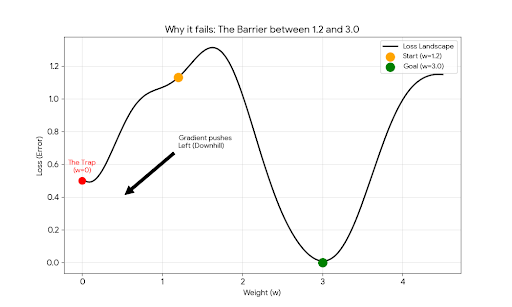
This code fails because Sine waves are non-convex. They have many ups and downs. If you initialize your guess (w=1.2) too far from the truth (w=3.0), a simple gradient descent algorithm will almost always get stuck in the wrong valley.

The code fails because the model gets caught in a Local Minimum.